Objective: Analyzing student performance data to identify score patterns and performance gaps based on attendance, and subject scores.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('student_performance.csv')
df

,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
0,S0001,15,Male,12,1.0,65.0,Postgraduate,No,No,40.0,NaN,72.0,81.0,50.33,Average,Pass
1,S0002,19,Female,9,NaN,58.0,Graduate,No,Yes,80.0,44.0,35.0,47.0,53.00,Average,Pass
2,S0003,14,Female,12,3.6,NaN,High School,Yes,Yes,83.0,73.0,59.0,58.0,71.67,Good,Pass
3,S0004,18,Female,9,5.5,68.0,Postgraduate,Yes,No,68.0,NaN,77.0,54.0,64.33,Average,Pass
4,S0005,14,Male,10,5.0,80.0,High School,Yes,No,41.0,46.0,36.0,68.0,41.00,Poor,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S4996,17,Male,11,4.0,50.0,Graduate,No,No,64.0,60.0,70.0,93.0,64.67,Average,Pass
4996,S4997,19,Male,10,5.6,90.0,High School,Yes,No,44.0,59.0,43.0,63.0,48.67,Poor,Fail
4997,S4998,16,Female,9,2.3,61.0,Graduate,No,No,95.0,41.0,82.0,62.0,72.67,Good,Pass
4998,S4999,15,Male,11,2.9,82.0,Graduate,No,Yes,66.0,45.0,61.0,75.0,57.33,Average,Pass


In [60]:
df.set_index('Student_ID', inplace=True)

In [61]:
df.shape

(5000, 15)

In [62]:
df.info()

<class 'pandas.DataFrame'>
Index: 5000 entries, S0001 to S5000
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   int64  
 1   Gender                      5000 non-null   str    
 2   Class                       5000 non-null   int64  
 3   Study_Hours_Per_Day         4997 non-null   float64
 4   Attendance_Percentage       4997 non-null   float64
 5   Parental_Education          4998 non-null   str    
 6   Internet_Access             5000 non-null   str    
 7   Extracurricular_Activities  4999 non-null   str    
 8   Math_Score                  4998 non-null   float64
 9   Science_Score               4994 non-null   float64
 10  English_Score               4997 non-null   float64
 11  Previous_Year_Score         4999 non-null   float64
 12  Final_Percentage            4998 non-null   float64
 13  Performance_Level           5000 non-null   

In [63]:
df.astype({'Age':'int64'})

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S0001,15,Male,12,1.0,65.0,Postgraduate,No,No,40.0,NaN,72.0,81.0,50.33,Average,Pass
S0002,19,Female,9,NaN,58.0,Graduate,No,Yes,80.0,44.0,35.0,47.0,53.00,Average,Pass
S0003,14,Female,12,3.6,NaN,High School,Yes,Yes,83.0,73.0,59.0,58.0,71.67,Good,Pass
S0004,18,Female,9,5.5,68.0,Postgraduate,Yes,No,68.0,NaN,77.0,54.0,64.33,Average,Pass
S0005,14,Male,10,5.0,80.0,High School,Yes,No,41.0,46.0,36.0,68.0,41.00,Poor,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S4996,17,Male,11,4.0,50.0,Graduate,No,No,64.0,60.0,70.0,93.0,64.67,Average,Pass
S4997,19,Male,10,5.6,90.0,High School,Yes,No,44.0,59.0,43.0,63.0,48.67,Poor,Fail
S4998,16,Female,9,2.3,61.0,Graduate,No,No,95.0,41.0,82.0,62.0,72.67,Good,Pass


Columns removed because they are no longer needed or outside scope 

In [64]:
df.drop(['Parental_Education','Previous_Year_Score','Final_Percentage','Performance_Level','Pass_Fail'],inplace = True,axis = 1)
df.head()


,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score
Student_ID,,,,,,,,,,
S0001,15,Male,12,1.0,65.0,No,No,40.0,NaN,72.0
S0002,19,Female,9,NaN,58.0,No,Yes,80.0,44.0,35.0
S0003,14,Female,12,3.6,NaN,Yes,Yes,83.0,73.0,59.0
S0004,18,Female,9,5.5,68.0,Yes,No,68.0,NaN,77.0
S0005,14,Male,10,5.0,80.0,Yes,No,41.0,46.0,36.0


In [65]:
df.isna().sum()

Age                           0
Gender                        0
Class                         0
Study_Hours_Per_Day           3
Attendance_Percentage         3
Internet_Access               0
Extracurricular_Activities    1
Math_Score                    2
Science_Score                 6
English_Score                 3
dtype: int64

In [66]:
df.info()

<class 'pandas.DataFrame'>
Index: 5000 entries, S0001 to S5000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   int64  
 1   Gender                      5000 non-null   str    
 2   Class                       5000 non-null   int64  
 3   Study_Hours_Per_Day         4997 non-null   float64
 4   Attendance_Percentage       4997 non-null   float64
 5   Internet_Access             5000 non-null   str    
 6   Extracurricular_Activities  4999 non-null   str    
 7   Math_Score                  4998 non-null   float64
 8   Science_Score               4994 non-null   float64
 9   English_Score               4997 non-null   float64
dtypes: float64(5), int64(2), str(3)
memory usage: 429.7+ KB


In [67]:
df.isna()


,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score
Student_ID,,,,,,,,,,
S0001,False,False,False,False,False,False,False,False,True,False
S0002,False,False,False,True,False,False,False,False,False,False
S0003,False,False,False,False,True,False,False,False,False,False
S0004,False,False,False,False,False,False,False,False,True,False
S0005,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
S4996,False,False,False,False,False,False,False,False,False,False
S4997,False,False,False,False,False,False,False,False,False,False
S4998,False,False,False,False,False,False,False,False,False,False


In [68]:
df['Study_Hours_Per_Day'] = df['Study_Hours_Per_Day'].fillna(df['Study_Hours_Per_Day'].mean())
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())
df['Attendance_Percentage'] = df['Attendance_Percentage'].fillna(df['Attendance_Percentage'].mean())
df.isnull().sum()

Age                           0
Gender                        0
Class                         0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Internet_Access               0
Extracurricular_Activities    1
Math_Score                    0
Science_Score                 0
English_Score                 3
dtype: int64

In [69]:
df.info()

<class 'pandas.DataFrame'>
Index: 5000 entries, S0001 to S5000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   int64  
 1   Gender                      5000 non-null   str    
 2   Class                       5000 non-null   int64  
 3   Study_Hours_Per_Day         5000 non-null   float64
 4   Attendance_Percentage       5000 non-null   float64
 5   Internet_Access             5000 non-null   str    
 6   Extracurricular_Activities  4999 non-null   str    
 7   Math_Score                  5000 non-null   float64
 8   Science_Score               5000 non-null   float64
 9   English_Score               4997 non-null   float64
dtypes: float64(5), int64(2), str(3)
memory usage: 429.7+ KB


In [70]:
#df[df['Extracurricular_Activities'].isna()]
df[df[['Extracurricular_Activities', 'English_Score']].isna().any(axis=1)]


,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score
Student_ID,,,,,,,,,,
S0009,18,Female,11,3.5,61.0,No,No,55.0,39.0,NaN
S0013,19,Male,10,1.5,64.0,Yes,Yes,35.0,95.0,NaN
S0030,16,Female,11,3.5,69.0,Yes,Yes,81.0,68.0,NaN
S0070,16,Female,9,5.8,91.0,Yes,NaN,93.0,93.0,41.0


In [71]:

df.loc[69,'Extracurricular_Activities'] = 'Yes'
df.loc[8,'English_Score'] = 90
df.loc[12,'English_Score'] = 85
df.loc[29,'English_Score'] = 95


In [72]:
df['Average_Score']= (df["Math_Score"] + df["Science_Score"] + df["English_Score"])/3
df["Average_Score"] = df["Average_Score"].round(2)

In [73]:
df["Total_Score"] = df["Math_Score"] + df["Science_Score"] + df["English_Score"]
df["Total_Score"] = df["Total_Score"].round(2)
df

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Average_Score,Total_Score
Student_ID,,,,,,,,,,,,
S0001,15.0,Male,12.0,1.000000,65.000000,No,No,40.0,66.906688,72.0,59.64,178.91
S0002,19.0,Female,9.0,3.288593,58.000000,No,Yes,80.0,44.000000,35.0,53.00,159.00
S0003,14.0,Female,12.0,3.600000,74.922153,Yes,Yes,83.0,73.000000,59.0,71.67,215.00
S0004,18.0,Female,9.0,5.500000,68.000000,Yes,No,68.0,66.906688,77.0,70.64,211.91
S0005,14.0,Male,10.0,5.000000,80.000000,Yes,No,41.0,46.000000,36.0,41.00,123.00
...,...,...,...,...,...,...,...,...,...,...,...,...
S5000,19.0,Female,10.0,2.000000,97.000000,No,Yes,69.0,53.000000,87.0,69.67,209.00
69,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN


In [74]:
df['Percentage'] = (df['Total_Score']/300)*100
df['Percentage'] = df['Percentage'].round(2)
df

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Average_Score,Total_Score,Percentage
Student_ID,,,,,,,,,,,,,
S0001,15.0,Male,12.0,1.000000,65.000000,No,No,40.0,66.906688,72.0,59.64,178.91,59.64
S0002,19.0,Female,9.0,3.288593,58.000000,No,Yes,80.0,44.000000,35.0,53.00,159.00,53.00
S0003,14.0,Female,12.0,3.600000,74.922153,Yes,Yes,83.0,73.000000,59.0,71.67,215.00,71.67
S0004,18.0,Female,9.0,5.500000,68.000000,Yes,No,68.0,66.906688,77.0,70.64,211.91,70.64
S0005,14.0,Male,10.0,5.000000,80.000000,Yes,No,41.0,46.000000,36.0,41.00,123.00,41.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
S5000,19.0,Female,10.0,2.000000,97.000000,No,Yes,69.0,53.000000,87.0,69.67,209.00,69.67
69,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN


In [75]:
for x in df['Percentage']:
    if x>=85:
        df.loc[df['Percentage']==x,'Performance_Level']='Excellent'
    elif x>=70:
        df.loc[df['Percentage']==x,'Performance_Level']='Good'
    elif x>=50:
        df.loc[df['Percentage']==x,'Performance_Level']='Average'
    else:
        df.loc[df['Percentage']==x,'Performance_Level']='Poor'


In [76]:
df['Status'] = df['Percentage'].apply(lambda x: 'Pass' if x>=40 else 'Fail')
df

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Average_Score,Total_Score,Percentage,Performance_Level,Status
Student_ID,,,,,,,,,,,,,,,
S0001,15.0,Male,12.0,1.000000,65.000000,No,No,40.0,66.906688,72.0,59.64,178.91,59.64,Average,Pass
S0002,19.0,Female,9.0,3.288593,58.000000,No,Yes,80.0,44.000000,35.0,53.00,159.00,53.00,Average,Pass
S0003,14.0,Female,12.0,3.600000,74.922153,Yes,Yes,83.0,73.000000,59.0,71.67,215.00,71.67,Good,Pass
S0004,18.0,Female,9.0,5.500000,68.000000,Yes,No,68.0,66.906688,77.0,70.64,211.91,70.64,Good,Pass
S0005,14.0,Male,10.0,5.000000,80.000000,Yes,No,41.0,46.000000,36.0,41.00,123.00,41.00,Poor,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S5000,19.0,Female,10.0,2.000000,97.000000,No,Yes,69.0,53.000000,87.0,69.67,209.00,69.67,Average,Pass
69,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fail
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,Fail


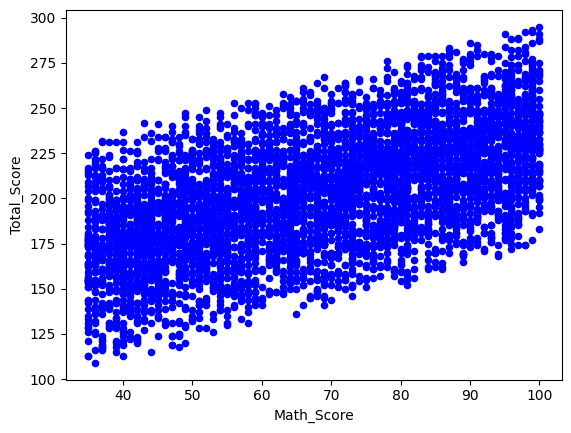

In [77]:
df.plot(kind = 'scatter', x = 'Math_Score', y = 'Total_Score', color = 'blue')
plt.show()


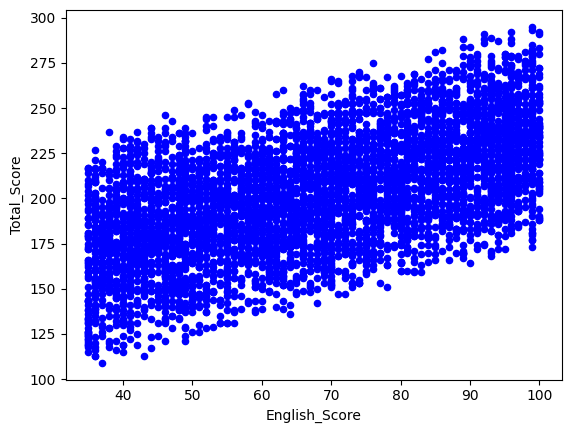

In [78]:
df.plot(kind = 'scatter', x = 'English_Score', y = 'Total_Score', color = 'blue')
plt.show()

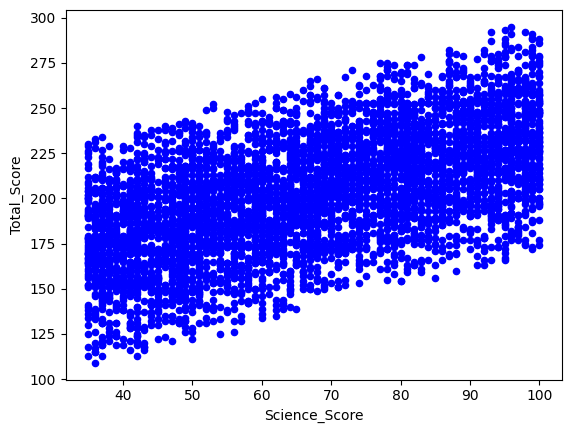

In [79]:
df.plot(kind = 'scatter', x = 'Science_Score', y = 'Total_Score', color = 'blue')
plt.show()

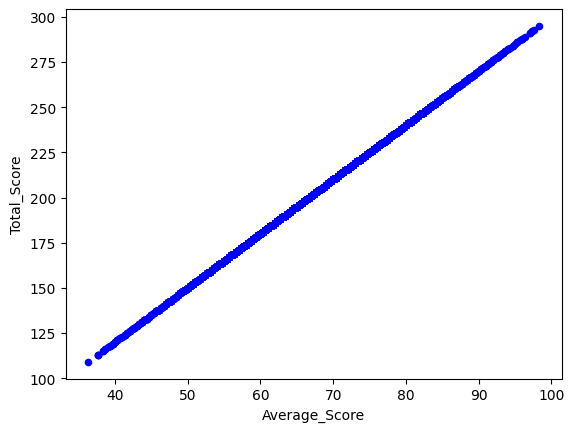

In [80]:
df.plot(kind = 'scatter', x = 'Average_Score', y = 'Total_Score', color = 'blue')
plt.show()

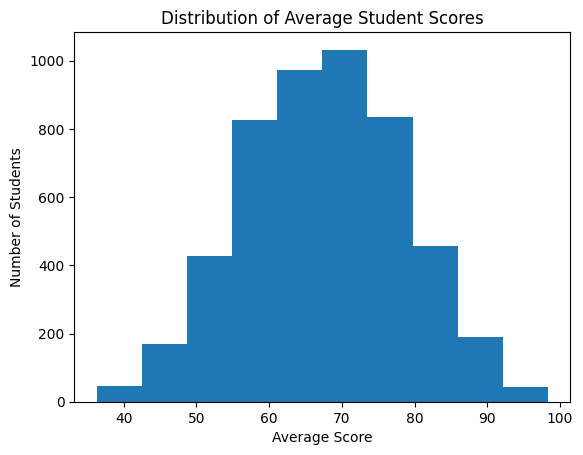

In [81]:
plt.hist(df["Average_Score"], bins=10)
plt.title("Distribution of Average Student Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()

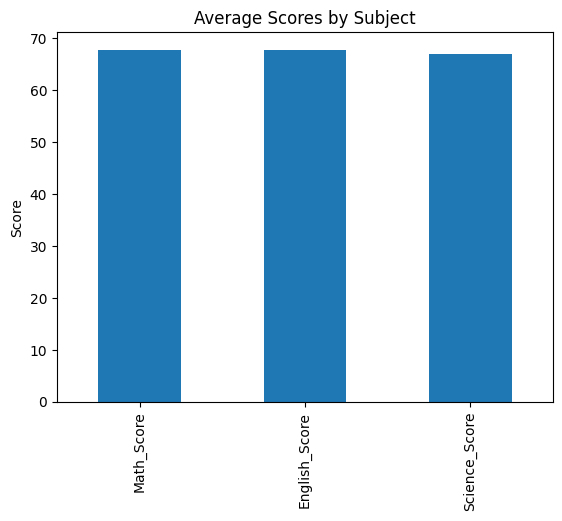

In [82]:
df[["Math_Score","English_Score","Science_Score"]].mean().plot(kind="bar")
plt.title("Average Scores by Subject")
plt.ylabel("Score")
plt.show()


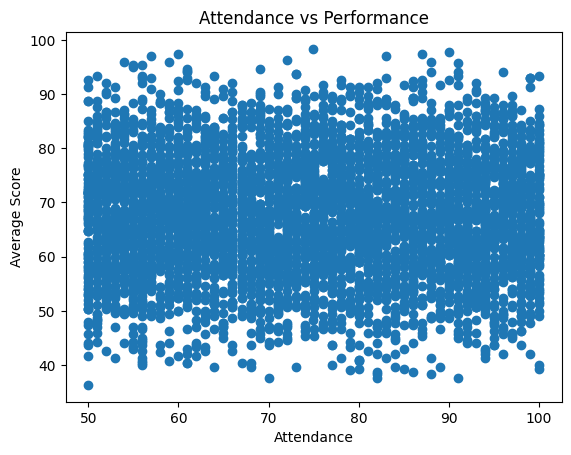

In [83]:
plt.scatter(df["Attendance_Percentage"], df["Average_Score"])
plt.xlabel("Attendance")
plt.ylabel("Average Score")
plt.title("Attendance vs Performance")
plt.show()
